## Useful Resources

https://arrow.apache.org/docs/python/generated/pyarrow.Table.html#pyarrow.Table.column

https://spark.apache.org/docs/latest/quick-start.html

https://arrow.apache.org/docs/python/pandas.html

https://spark.apache.org/docs/2.3.2/sql-programming-guide.html#pyspark-usage-guide-for-pandas-with-apache-arrow

https://towardsdatascience.com/pyspark-in-google-colab-6821c2faf41c

https://colab.research.google.com/github/asifahmed90/pyspark-ML-in-Colab/blob/master/PySpark_Regression_Analysis.ipynb#scrollTo=sKSqdT9QgkfD

https://www.analyticsvidhya.com/blog/2020/11/a-must-read-guide-on-how-to-work-with-pyspark-on-google-colab-for-data-scientists/

https://www.datacamp.com/community/tutorials/apache-spark-tutorial-machine-learning#load

https://www.datacamp.com/community/tutorials/apache-spark-tutorial-machine-learning




https://towardsdatascience.com/guide-to-big-data-joins-python-sql-pandas-spark-dask-51b7f4fec810 

https://www.programcreek.com/python/?CodeExample=read%20sql




TODO:
1. Filtering spark tables


In [ ]:
%%capture
!pip install pyspark
!pip install altair_viewer
!pip install -q findspark

In [ ]:
#!export PYSPARK_DRIVER_PYTHON="/usr/local/bin/ipython"

In [ ]:
!apt-get install openjdk-11-jdk-headless -qq > /dev/null
!wget -q https://www-us.apache.org/dist/spark/spark-3.1.2/spark-3.1.2-bin-hadoop3.2.tgz
!tar xf spark-3.1.2-bin-hadoop3.2.tgz
!pip install -q findspark

import os
os.environ['JAVA_HOME'] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ['SPARK_HOME'] = "/content/spark-3.1.2-bin-hadoop3.2"

In [ ]:
from pyspark.sql import SparkSession
import findspark

# Alternative method for starting the session
# spark = SparkSession.builder\
#         .master("local")\
#         .appName("Colab")\
#         .config('spark.ui.port', '4050')\
#         .getOrCreate()

findspark.init()
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [ ]:
import numpy as np
import pandas as pd
import datetime
import os
import pathlib
import shutil
import webbrowser
import time
import pathlib
import math
import sklearn
from sklearn.preprocessing import LabelEncoder

import sqlite3
from sqlite3 import Error
import sqlalchemy
from sqlalchemy import create_engine

# Import Spark libraries
import pyarrow as pa
import pyspark
from pyspark.sql import *
from pyspark.context import SparkContext

# Import data visualization libraries
import altair as alt
import altair_viewer

import plotly
import plotly.express as px
import plotly.graph_objects as go

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
#sns.set(style='ticks')
sns.set_theme(style='white',context='talk')

# Allow code cells to display multiple items in the output instead of the last item at the bottom of the cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# Expand the number of rows and columns displayed in the notebook outputs
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('max_colwidth', 50)
pd.set_option('memory_usage',True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

con = sqlite3.connect(r"/content/drive/MyDrive/Development/Project Folders/Virginia_Court_Data_Analysis/Virginia_Court_Case_Database.db")
engine = create_engine('sqlite:///:memory:')
cur = con.cursor()

#spark = pyspark.sql.SparkSession.builder.appName('Dataframe').getOrCreate()

Mounted at /content/drive


In [ ]:
# from pyspark.sql import SQLContext

# sqlContext = SQLContext(spark)

# df1 = sqlContext.read.format('jdbc').\
#      options(url=con,\
#      dbtable='Circuit_Criminal',driver='py2jdbc').load()

In [ ]:
def get_data():
  df1 = pd.read_sql("""SELECT * FROM Circuit_Criminal where ChargeType is not null""",con=con)

#  df1 = df1.drop(['VAAlcoholSafetyAction', 'AppealedDate','RestitutionPaid','RestrictionEndDate',
#                  'OperatorLicenseSuspensionTime','Address','DrivingRestrictions','RestrictionEffectiveDate',
#                  'TrafficFatality','Military','DriverImprovementClinic','HearingRoom','Locality',
#                  'person_id','CourtDMVSurrender','fips','Filed','OffenseDate','ArrestDate'],axis=1)

  df1['SentenceTimeYears'] = (df1['SentenceTime'] / 365)

  df1 = df1.dropna(how='all',axis=1)

  table1 = pa.Table.from_pandas(df1)

  return table1

In [ ]:
table1 = get_data()

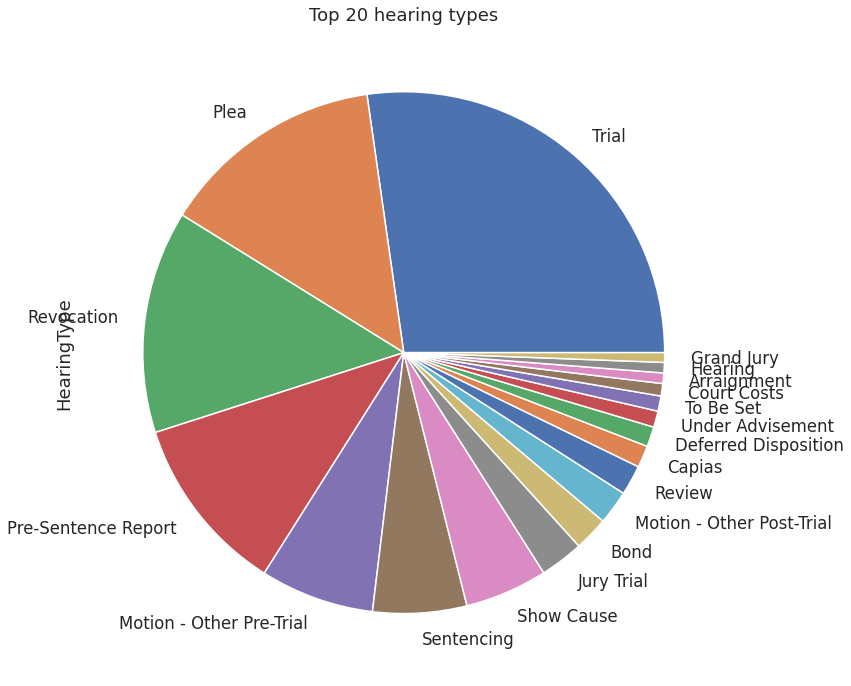

In [ ]:
def plot1():
  fig, ax = plt.subplots(figsize=(12,12))
  t2 = table1.select(['ChargeType','HearingType']).to_pandas()
  return t2['HearingType'].value_counts()[:19].plot(kind='pie',ax=ax,title='Top 20 hearing types')
  
plot1()

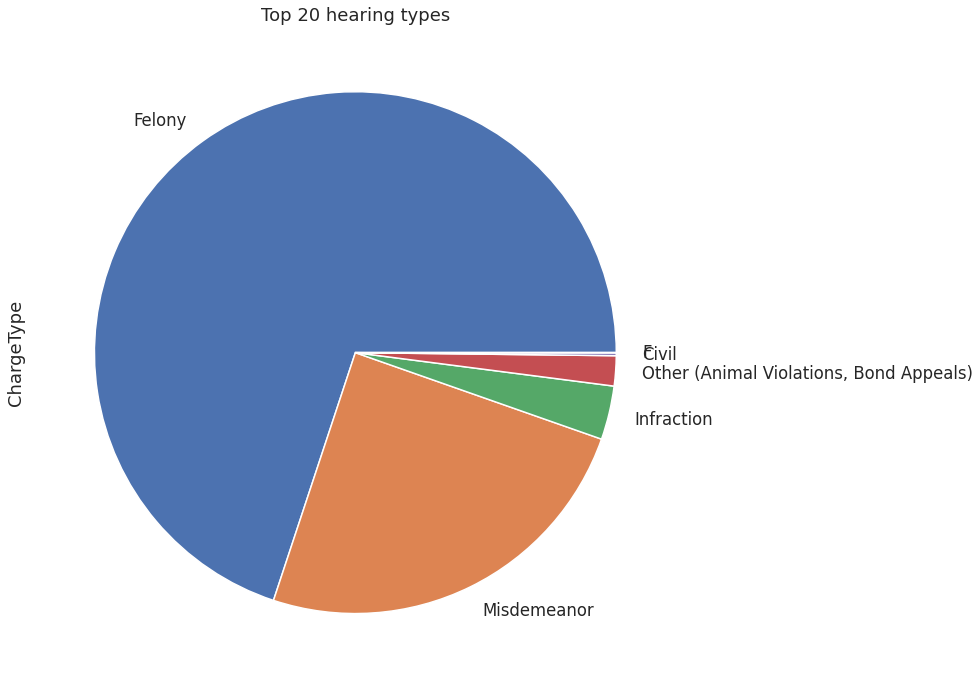

In [ ]:
def plot1():
  
  fig, ax = plt.subplots(figsize=(12,12))

  t2 = table1.select(['ChargeType','HearingType']).to_pandas()
  return t2['ChargeType'].value_counts()[:19].plot(kind='pie',ax=ax,title='Top 20 hearing types')
  

plot1()

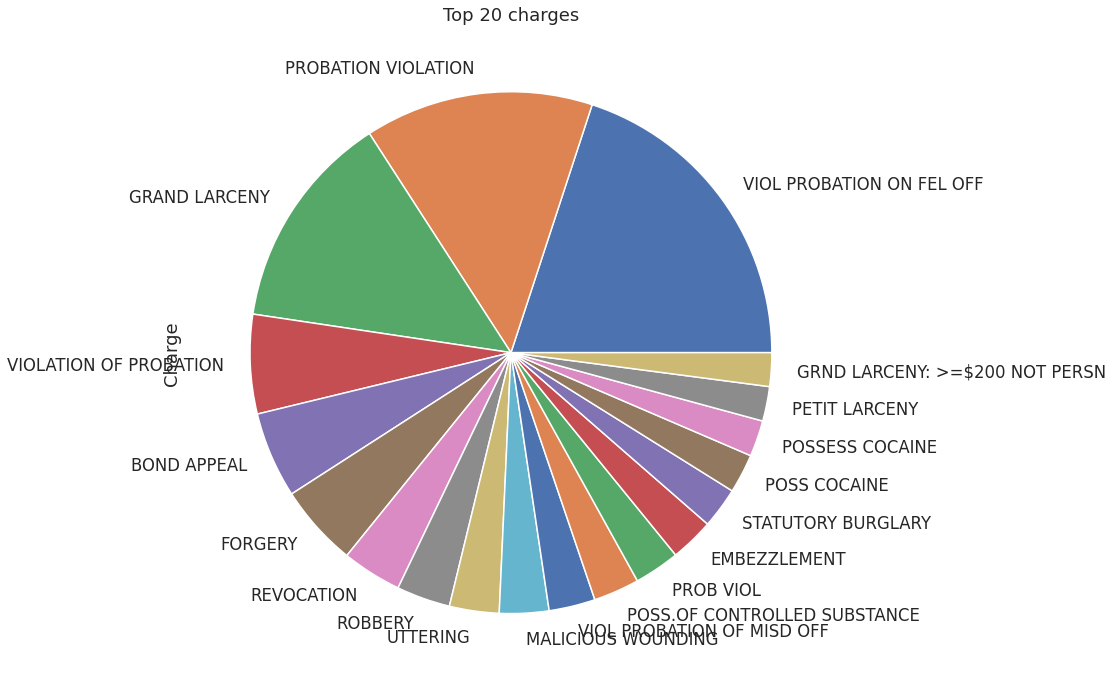

In [ ]:
def plot1():
  
  fig, ax = plt.subplots(figsize=(12,12))

  t2 = table1.select(['Charge']).to_pandas()
  return t2['Charge'].value_counts()[:19].plot(kind='pie',ax=ax,title='Top 20 charges')
  
plot1()

In [ ]:
def p1():
  n = 20
  t2 = table1.select(['Charge']).to_pandas()
  top_n = pd.Series(t2['Charge'].value_counts().iloc[:n],name='charge_type')
  fig = px.pie(t2,values=top_n,names=top_n.index,template='plotly_dark',
               title=f"Top {n} most common criminal charge types in VA over the last 10 years")
  fig.update_traces(textposition='auto',textinfo='percent+label')
  
  
  return fig.show()

p1()

In [ ]:
def p1():
  n = 10
  t2 = table1.select(['ChargeType','DispositionCode','Race','Sex']).to_pandas()
  #top_n = pd.Series(t2['Charge'].value_counts().iloc[:n],name='charge_type')
  
  top_n = pd.DataFrame()
  fig = px.pie(t2,values=top_n,names=top_n.index,template='plotly_dark',
               title=f"Top {n} most common criminal charge types in VA over the last 10 years")
  fig.update_traces(textposition='auto',textinfo='percent+label')
  
  
  return fig.show()

p1()

In [ ]:
def ct1():
  t2 = table1.select(['ChargeType','DispositionCode','Race','Sex']).to_pandas()
  #df1 = pd.DataFrame(t2)


  return pd.crosstab(index=t2['ChargeType'],columns=[t2['Sex'],t2['Race']])

ct1 = ct1()
ct1
#px.bar(ct1,y=ct1)

Sex                                              Female                                                                                                                                                                                                    Male                                                                                                                                                                                          
Race                                    American Indian American Indian Or Alaskan Native Asian Or Pacific Islander  Black Black (Non-Hispanic) Hispanic Other (Includes Not Applicable, Unknown) Unknown  White White Caucasian (Non-Hispanic) American Indian American Indian Or Alaskan Native Asian Or Pacific Islander   Black Black (Non-Hispanic) Hispanic Other (Includes Not Applicable, Unknown) Unknown   White White Caucasian (Non-Hispanic)
ChargeType                                                                                                                                                                                                                                                                                                                                                                                                                                               
Civil                                                 2                                 0                         9    126                  492        6                                      450       3    213                            561               4                                 1                        29     467                 1875       50                                      512      11     527                           1453
F                                                     0                                 0                         0      0                    0        0                                        0       0      0                              0               0                                 0                         0       0                    1        0                                        0       0       0                              0
Felony                                              157                                26                      1842  19605               174897     1671                                     3798     206  60085                         349680             706                                43                      6361  100879               808293    17169                                    10965     698  131536                         846986
Infraction                                           27                                 3                       302   1417                16491      352                                      716      29   1360                          17099             139                                18                       654    2777                32562     1315                                     1771      85    2763                          40487
Misdemeanor                                         103                                10                      1119   8536                71436     1335                                     1895     100  18127                         117155             450                                43                      3068   32998               255980     8692                                     5861     343   42408                         322208
Other (Animal Violations, Bond Appeals)               2                                 1                        63    849                 2705        7                                       51      13   1657                           4193              14                                 4                       306    7910                23613      133                                      318      42    6619                          18496

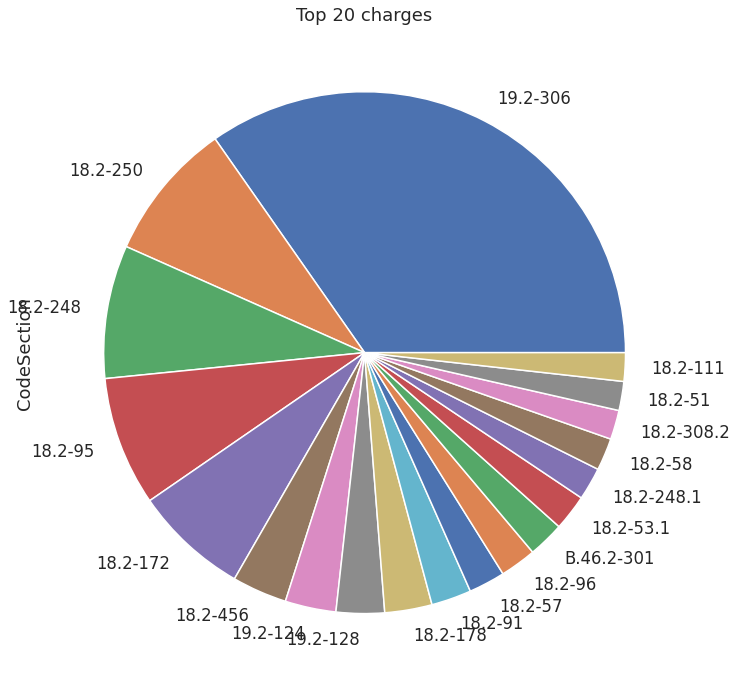

In [ ]:
def plot1():
  
  fig, ax = plt.subplots(figsize=(12,12))

  t2 = table1.select(['CodeSection']).to_pandas()
  return t2['CodeSection'].value_counts()[:19].plot(kind='pie',ax=ax,title='Top 20 charges')
  
plot1()

In [ ]:
def p1():
  n = 20
  #t2 = table1.select(['Charge','HearingResult','HearingType','Race','Sex','ConcludedBy','AmendedCharge']).to_pandas()
  t2 = table1.select(['ChargeType','HearingResult','Race','Sex','ConcludedBy']).to_pandas()
  #df1 = pd.DataFrame(t2)
  #fig = px.bar(df1,x=df1['Race'],y=df1['Race'],template='plotly_dark',
  #             title=f"Top {n} most common criminal charge types in VA over the last 10 years")
  #fig.update_traces(textposition='auto',textinfo='percent+label')
  #pd.pivot(t2,index=['Sex'],values=t2['ChargeType'])


  #pd.crosstab(index=t2['ConcludedBy'],columns=t2['Sex'])

  fig = px.bar(t2,x=t2['ConcludedBy'],y=t2['Sex'],template='plotly_dark')
  return fig.show()

p1()

In [ ]:
df1.shape
print()
df1.head()
print()
df1.info()

(3634322, 32)

,HearingDate,HearingResult,HearingJury,HearingPlea,HearingType,Commencedby,Sex,Race,Charge,CodeSection,ChargeType,Class,DispositionCode,DispositionDate,ConcludedBy,AmendedCharge,AmendedCodeSection,AmendedChargeType,JailPenitentiary,ConcurrentConsecutive,LifeDeath,SentenceTime,SentenceSuspended,FineAmount,Costs,FinesCostPaid,ProgramType,ProbationType,ProbationTime,ProbationStarts,RestitutionAmount,SentenceTimeYears
0,2000-12-19,Dismissed,None,None,Under Advisement,General District Court Appeal,Male,White Caucasian (Non-Hispanic),ELUDE LAW ENFORCEMENT OFFICER,46.2-817,Misdemeanor,None,Dismissed,2000-12-19,Dismissal,None,None,None,None,None,None,NaN,NaN,NaN,NaN,None,None,None,NaN,None,NaN,NaN
1,2000-09-19,Dismissed,None,None,Trial,J&Dr Appeal,Male,White Caucasian (Non-Hispanic),OBSCENE PHONE CALL,18.2-427,Misdemeanor,1,Not Guilty/Acquitted,2000-09-19,Dismissal,None,None,None,None,None,None,NaN,NaN,NaN,NaN,None,None,None,NaN,None,NaN,NaN
2,2000-09-07,Sent,None,None,Trial,General District Court Appeal,Male,White Caucasian (Non-Hispanic),SHOOT FROM A ROAD,18.2-286,Misdemeanor,None,Guilty,2000-09-07,Guilty Plea,None,None,None,None,None,None,NaN,NaN,300.0,81.0,t,None,None,NaN,None,NaN,NaN
3,2000-09-07,Nolle Prosequi,None,None,Trial,General District Court Appeal,Male,White Caucasian (Non-Hispanic),SHOOT FROM A VEHICLE,29.1-521(6),Misdemeanor,None,Nolle Prosequi,2000-09-07,Nolle Prosequi,None,None,None,None,None,None,NaN,NaN,NaN,NaN,None,None,None,NaN,None,NaN,NaN
4,2000-09-07,Sent,None,None,Trial,General District Court Appeal,Male,White Caucasian (Non-Hispanic),HUNT POSTED W/O WRITTEN PERMIT,18.2-134,Misdemeanor,None,Guilty,2000-09-07,Guilty Plea,None,None,None,None,None,None,NaN,NaN,50.0,53.0,t,None,None,NaN,None,NaN,NaN



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3634322 entries, 0 to 3634321
Data columns (total 32 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   HearingDate            object 
 1   HearingResult          object 
 2   HearingJury            object 
 3   HearingPlea            object 
 4   HearingType            object 
 5   Commencedby            object 
 6   Sex                    object 
 7   Race                   object 
 8   Charge                 object 
 9   CodeSection            object 
 10  ChargeType             object 
 11  Class                  object 
 12  DispositionCode        object 
 13  DispositionDate        object 
 14  ConcludedBy            object 
 15  AmendedCharge          object 
 16  AmendedCodeSection     object 
 17  AmendedChargeType      object 
 18  JailPenitentiary       object 
 19  ConcurrentConsecutive  object 
 20  LifeDeath              object 
 21  SentenceTime           float64
 22  SentenceSuspended

In [ ]:
df1.isnull().sum().sort_values(ascending=True)

HearingDate                    0
HearingType                    0
Filed                          0
Locality                       0
Sex                            0
ChargeType                     0
Commencedby                    3
Charge                         4
Race                       12697
OffenseDate                13325
CodeSection                21614
HearingResult              85809
DispositionCode           117126
ConcludedBy               117134
DispositionDate           117172
ArrestDate                607454
Class                    1368356
JailPenitentiary         1765369
SentenceTimeYears        1781551
SentenceTime             1781551
HearingRoom              1889210
SentenceSuspended        1969466
Costs                    2060451
ProbationType            2385668
ProbationTime            2537962
FineAmount               2620077
RestitutionAmount        2783440
ProbationStarts          2822947
HearingPlea              2925916
FinesCostPaid            2975692
Concurrent

In [ ]:
#fig, ax = plt.subplots(figsize=(6,6))

#sns.catplot(x=df1.loc[(df1['ChargeType'] != np.nan)],dropna=True,kind='swarm')

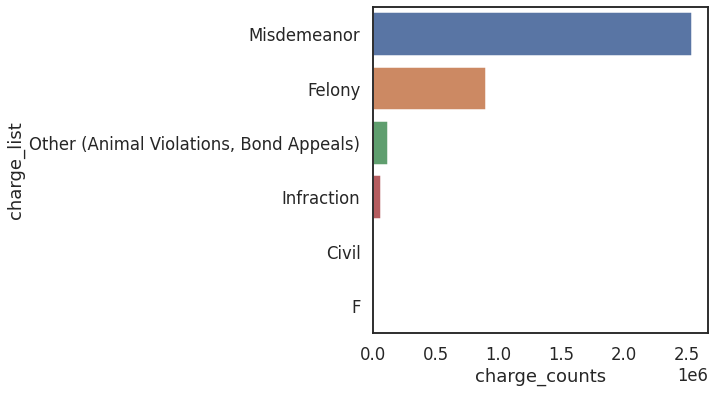

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))

charge_list = pd.unique(df1['ChargeType'])
charge_counts = df1['ChargeType'].value_counts()
charge_dict1 = {'charge_list': charge_list,
                'charge_counts': charge_counts}
charge_df = pd.DataFrame.from_dict(charge_dict1)

sns.barplot(y=charge_df['charge_list'], x=charge_df['charge_counts'],orient='h')


TypeError: ignored

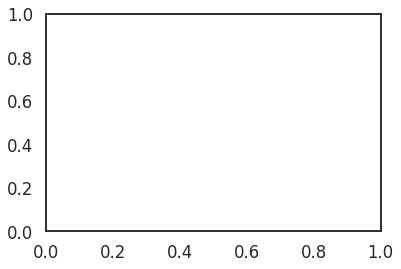

In [ ]:
sns.barplot(x=df1.loc[(df1['AmendedChargeType'] != np.nan)].all(),orientation='vertical')

In [ ]:
#df1['HearingResult'].value_counts()
#fig = px.bar(df1,x='HearingResult',orientation='h')
#fig.show()

fig = px.bar(df1,y='ChargeType',orientation='h',title='Charges by type in VA Circuit Court')
fig.show()

In [ ]:
fig = go.Figure(data=go.Bar(x=df1['Sex']))
fig.show()

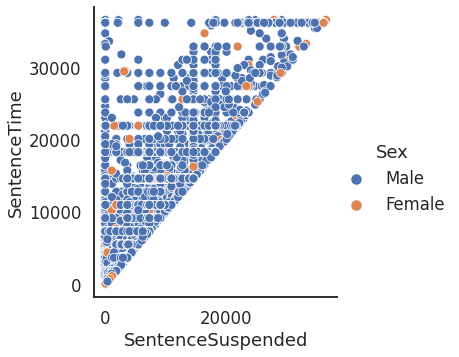

In [ ]:
sns.relplot(x='SentenceSuspended',y='SentenceTime',hue='Sex',data=df1)

In [ ]:
#fig, ax = plt.subplots(figsize=(15,10))
#df1['ChargeType'].value_counts().plot(kind='bar',ax=ax,title=f"Counts of charge types for {df1.shape[0]} VA criminal circuit cases")

alt.Chart(df1.iloc[0:4999]).mark_bar(color='darkgreen').encode(
    x='HearingType:N',
    y='count():Q',
    tooltip=['HearingType:N','count():Q']
).properties(height=400,width=600,title=f"Hearing results for 5000 civil criminal cases")

Output hidden; open in https://colab.research.google.com to view.